# Градиентный бустинг для Классификации

В текущем ДЗ Вам предстоит ознакомиться и попрактиковаться с реализацией градиентного бустинга на примере

## Создадим искусственный сет для классификации

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights = [0.3])
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## Задание 0. (0.5 балла)
Оцените количество уникальных классов в выборки и их количество. Ответ выведите ниже. Является ли выборка сбалансированной?

***Непонятно как можно оценить количество уникальных классов в выборки и их количество? Это массив из чисел, распределенных нормально (видно на графике),что в принципе очевидно, поскольку создан с помощь random***



In [ ]:
X

array([[ 2.56999479e+00, -1.30199971e-01,  3.16075093e+00, ...,
        -1.93094078e+00,  3.26130366e+00,  2.05692145e+00],
       [ 3.41293174e-01,  2.51321418e+00, -8.04165720e-01, ...,
         6.24734437e+00, -1.92769365e+00,  2.95031490e+00],
       [ 2.27539972e+00,  3.36561455e+00,  1.71643620e-01, ...,
         2.74693781e+00,  1.34924444e-01,  2.00339547e+00],
       ...,
       [ 5.69904851e-03, -3.15552113e+00,  3.02233214e+00, ...,
        -3.27700667e+00,  2.45496810e+00,  6.96787847e-01],
       [ 3.38493810e+00,  2.41530402e+00,  7.24064143e-01, ...,
         3.30819200e+00, -6.90563694e-01,  2.86203300e+00],
       [-9.85342988e-01,  8.39190472e-01,  2.58208030e+00, ...,
         3.04705685e+00,  6.68856406e-01,  3.32838496e+00]])

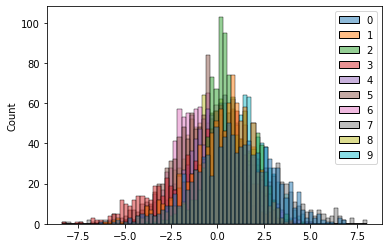

In [ ]:
sns.histplot(X)

In [ ]:
X_df = pd.DataFrame(data=X)

***Переделаем в DataFrame  и посмотрим что здесь можно увидеть:***

In [ ]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.890556,0.232020,0.685109,-0.703394,0.164055,-0.781005,-0.722015,0.593716,-0.000062,0.953890
std,2.099229,1.658484,1.210203,2.072775,1.500219,1.531648,1.537701,2.679353,1.399431,1.488838
min,-6.281683,-6.016746,-3.737073,-8.233174,-5.689715,-4.921054,-5.456559,-8.350599,-3.554258,-3.896057
25%,-0.490369,-0.737982,-0.072815,-1.930141,-0.903596,-1.859141,-1.812578,-1.227914,-1.067720,-0.046580
50%,0.884721,0.496911,0.535416,-0.247966,0.198079,-0.703296,-0.802294,0.661021,-0.087370,0.994666
75%,2.358449,1.403285,1.553949,0.837058,1.213610,0.243098,0.176575,2.461927,1.080707,1.997766
max,6.868252,3.937792,4.595307,3.972222,4.188797,4.053637,5.089334,8.035176,3.781765,4.979226


### Задание 1. (1 балл)
1. Выполните кросс-валидацию со стратификацией.

Для этого сперва необходимо инициализировать метод RepeatedStratifiedKFold со следующими параметрами: n_splits=10, n_repeats=3, random_state=1. 

Затем инициализировать метод cross_val_score (сохраните его в переменную n_scores), передать в него вашу модель, X, y и cv=cv, где cv это инициализированный ранее RepeatedStratifiedKFold. Также укажите n_jobs = -1 и error_score='raise'.

In [ ]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.919 (0.028)


### Задание 2. (6 заданий по 0,5 балла)
1. Разделите ваш датасет (X,y) на тренировочную и тестовые выборки c test_size=0.2, random_state=1.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

2. Инициализируйте модель GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

3. Обучите модель при помощи метода fit() на тренировочных данных (пока не указывайте дополнительных настроек модели, передайте в метод только X_train, y_train)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

4. Сделайте предсказания при помощи метода predict на тестовом наборе данных и сохраните предсказания в переменную y_predicted

In [ ]:
y_predicted = model.predict(X_val)

5. При помощи метода confusion_matrix из sklearn выведите матрицу ошибок алгоритма на тестовом наборе данных (между y_test и y_predicted). Можете (по желанию) ее визуализировать при помощи библиотеки seaborn - сиборн удобен для визуализации матриц ошибок.

In [ ]:
confusion_matrix(y_val, y_predicted)

array([[ 45,  13],
       [  9, 133]])

6. Посчитайте метрику ROC AUC и F1 score на тестовом наборе данных (между y_test и y_predicted)

In [ ]:
roc_auc_score(y_val, y_predicted)

0.8562408936376881

In [ ]:
f1_score(y_val, y_predicted)

0.9236111111111112

## Задание 3 (3 балла)

До этого мы пользовались с Вами методом "из коробки". Это не есть хорошо, поэтому поиграйте с настройками гиперпараметров алгоритма (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), чтобы улучшить вид confusion matrix, а также roc_auc_score и f1_score

In [ ]:
model_0 = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=100,
                                   subsample=1,
                                   min_samples_split=2,
                                   max_depth=2
                                   )

***Стартовые значения "из коробки"***

In [ ]:
model_0.fit(X_train, y_train)
y_predicted = model_0.predict(X_val)
print('cof_matrix: ', confusion_matrix(y_val, y_predicted))
print('roc_auc_score: ', roc_auc_score(y_val, y_predicted))
print('f1_score: ', f1_score(y_val, y_predicted))

cof_matrix:  [[ 40  18]
 [ 10 132]]
roc_auc_score:  0.8096163186012628
f1_score:  0.9041095890410958


In [ ]:
model_1 = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=100,
                                   subsample=1,
                                   min_samples_split=2,
                                   max_depth=8
                                   )

***Увеличили глубину "max_depth"***

In [ ]:
model_1.fit(X_train, y_train)
y_predicted = model_1.predict(X_val)
print('cof_matrix: ', confusion_matrix(y_val, y_predicted))
print('roc_auc_score: ', roc_auc_score(y_val, y_predicted))
print('f1_score: ', f1_score(y_val, y_predicted))

cof_matrix:  [[ 49   9]
 [  7 135]]
roc_auc_score:  0.8977659057795047
f1_score:  0.9440559440559442


In [ ]:
model_2 = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=200,
                                   subsample=1,
                                   min_samples_split=2,
                                   max_depth=8
                                   )

***Увеличели колличество эстиматоров "n_estimators"***

In [ ]:
model_2.fit(X_train, y_train)
y_predicted = model_2.predict(X_val)
print('cof_matrix: ', confusion_matrix(y_val, y_predicted))
print('roc_auc_score: ', roc_auc_score(y_val, y_predicted))
print('f1_score: ', f1_score(y_val, y_predicted))

cof_matrix:  [[ 50   8]
 [  7 135]]
roc_auc_score:  0.9063865954346769
f1_score:  0.9473684210526315


In [ ]:
model_3 = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.25,
                                   n_estimators=200,
                                   subsample=1,
                                   min_samples_split=2,
                                   max_depth=8
                                   )

***Увеличили "learning_rate"***

In [ ]:
model_3.fit(X_train, y_train)
y_predicted = model_3.predict(X_val)
print('cof_matrix: ', confusion_matrix(y_val, y_predicted))
print('roc_auc_score: ', roc_auc_score(y_val, y_predicted))
print('f1_score: ', f1_score(y_val, y_predicted))

cof_matrix:  [[ 49   9]
 [  5 137]]
roc_auc_score:  0.9048081593006314
f1_score:  0.951388888888889


**ВЫВОД: Для данной выборки и модели максимальное улучшение дало увеличение глубины "max_depth", прочие параметры не так сильно повлияли**